In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('matches.csv')

In [4]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.shape

(756, 18)

In [6]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
# date column has object datatype so change to datefime dtype
df['date'] = pd.DatetimeIndex(df['date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   Season           756 non-null    object        
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [10]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [11]:
# now sort entry by date
df.sort_values(by='date',inplace=True,ignore_index=True)
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,77,IPL-2008,Hyderabad,2008-01-05,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin,NaN
1,78,IPL-2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN
2,117,IPL-2008,Mumbai,2008-01-06,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
3,79,IPL-2008,Chennai,2008-02-05,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
4,111,IPL-2008,Bangalore,2008-03-05,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri,NaN


In [12]:
# check for missing entries
df.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [13]:
# umpire3 column dropped because has mximum entries are missing
df.drop(columns='umpire3',inplace=True)

In [14]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [15]:
# umpie1 and umpire2 are filled by backfill method
df.umpire1.fillna(method='backfill',inplace=True)
df.umpire2.fillna(method='bfill',inplace=True)

In [16]:
# player of the match,city and winner will be filled as NA
df.player_of_match.fillna(value='NA',inplace=True)
df.winner.fillna(value='NA',inplace=True)
df.city.fillna(value='NA',inplace=True)

In [17]:
df.isna().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

### Compare winner and toss winner

In [22]:
winner_count = pd.DataFrame(df['winner'].value_counts())
winner_count

,winner
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29
Gujarat Lions,13


In [23]:
toss_winner_count = pd.DataFrame(df['toss_winner'].value_counts())
toss_winner_count

,toss_winner
Mumbai Indians,98
Kolkata Knight Riders,92
Chennai Super Kings,89
Kings XI Punjab,81
Royal Challengers Bangalore,81
Rajasthan Royals,80
Delhi Daredevils,80
Sunrisers Hyderabad,46
Deccan Chargers,43
Pune Warriors,20


In [26]:
combine_winner = winner_count.join(toss_winner_count).dropna()

In [27]:
combine_winner

,winner,toss_winner
Mumbai Indians,109,98.0
Chennai Super Kings,100,89.0
Kolkata Knight Riders,92,92.0
Royal Challengers Bangalore,84,81.0
Kings XI Punjab,82,81.0
Rajasthan Royals,75,80.0
Delhi Daredevils,67,80.0
Sunrisers Hyderabad,58,46.0
Deccan Chargers,29,43.0
Gujarat Lions,13,15.0


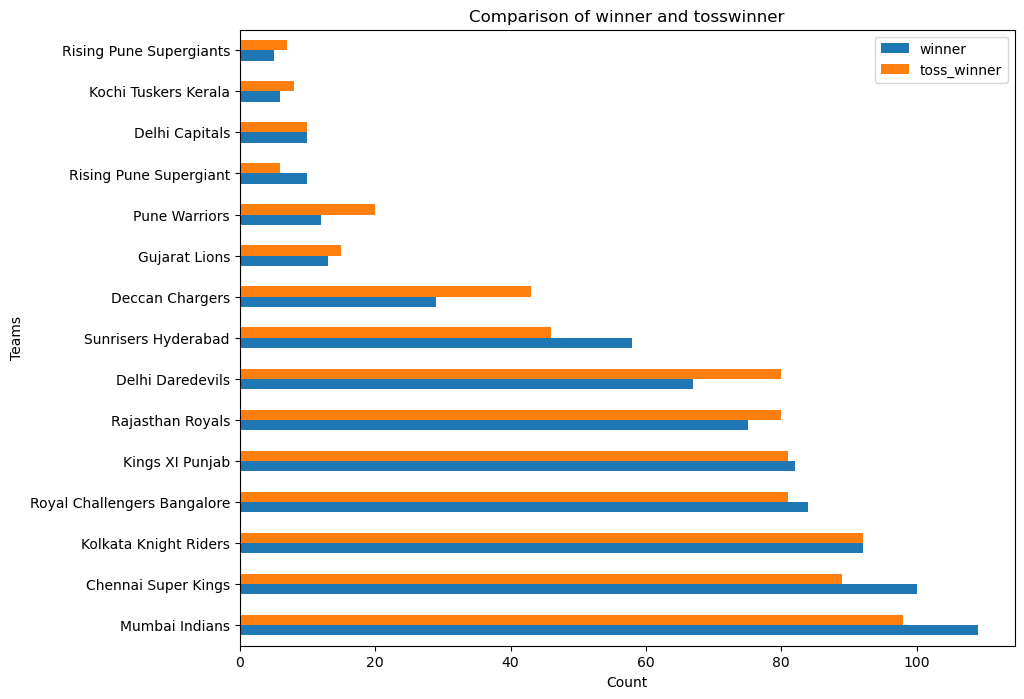

In [32]:
combine_winner.plot(kind='barh',figsize=(10,8))
plt.xlabel('Count')
plt.ylabel('Teams')
plt.title('Comparison of winner and tosswinner')
plt.show()

Here we can see if tean won the toss then they have higher chance of winning match

### Comparison between toss decision and winner

In [33]:
df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,77,IPL-2008,Hyderabad,2008-01-05,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin
1,78,IPL-2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar


In [34]:
filter1 = df['toss_winner'] == df['winner']
filter1

0       True
1       True
2       True
3      False
4      False
       ...  
751     True
752     True
753     True
754     True
755     True
Length: 756, dtype: bool

In [35]:
filter2 = df['toss_decision'] == 'bat'
filter2

0      False
1       True
2      False
3       True
4      False
       ...  
751    False
752    False
753    False
754    False
755     True
Name: toss_decision, Length: 756, dtype: bool

In [46]:
filter3 = df['toss_decision'] == 'field'
filter3

0       True
1      False
2       True
3      False
4       True
       ...  
751     True
752     True
753     True
754     True
755    False
Name: toss_decision, Length: 756, dtype: bool

In [38]:
choose_bat = df.where(filter1 & filter2).dropna().shape[0]
choose_bat

134

In [61]:
choose_bat = pd.DataFrame(choose_bat,columns=['bat'],index=['Count'])

In [62]:
choose_field = df.where(filter1 & filter3).dropna().shape[0]
choose_field = pd.DataFrame(data=[choose_field],columns=['field'],index=['Count'])

In [63]:
decisions = choose_bat.join(choose_field).T
decisions

,Count
bat,134
field,259


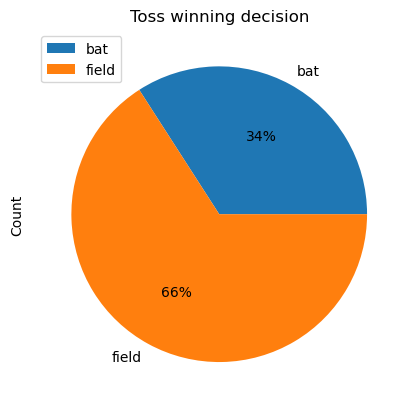

In [66]:
decisions.plot(kind='pie',subplots=True,autopct='%.f%%')
plt.title('Toss winning decision')
plt.show()

From above we see that if the team won the toss choose to field has higher percentage.
If the winner team choose to field after tosswinning then have higher winning chance i.e around 66%

### Venue wise comparison between toss_winner and winner

In [67]:
df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,77,IPL-2008,Hyderabad,2008-01-05,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin
1,78,IPL-2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar


In [68]:
choose_bat = df.where(filter1 & filter2).dropna().shape[0]

In [69]:
l = list(df.groupby(['venue']))

In [73]:
venue_field = []
matches_won_field = []
for i in range(len(l)):
    count = l[i][1].where(filter1 & filter3).dropna().shape[0]
    if count > 0:
        venue_field.append(l[i][0])
        matches_won_field.append(count)

In [116]:
won_field_first = pd.DataFrame([venue_field,matches_won_field],index=['stadium','matches_won_field_first']).T
won_field_first 

,stadium,matches_won_field_first
0,ACA-VDCA Stadium,2
1,Barabati Stadium,3
2,Brabourne Stadium,3
3,De Beers Diamond Oval,1
4,Dr DY Patil Sports Academy,6
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2
6,Dubai International Cricket Stadium,2
7,Eden Gardens,31
8,Feroz Shah Kotla,20
9,Feroz Shah Kotla Ground,3


In [92]:
venue_bat = []
matches_won_bat = []
for j in range(len(l)):
    count1 = l[j][1].where(filter1 & filter2).dropna().shape[0]
    if count1 > 0:
        venue_bat.append(l[j][0])
        matches_won_bat.append(count1)

In [115]:
won_bat_first = pd.DataFrame([venue_bat,matches_won_bat],index=['stadium','matches_won_bat_first']).T
won_bat_first

,stadium,matches_won_bat_first
0,Barabati Stadium,2
1,Brabourne Stadium,4
2,Buffalo Park,2
3,De Beers Diamond Oval,1
4,Dr DY Patil Sports Academy,3
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2
6,Dubai International Cricket Stadium,1
7,Eden Gardens,12
8,Feroz Shah Kotla,13
9,Feroz Shah Kotla Ground,2


In [122]:
venue_wise_toss =won_bat_first.merge(won_field_first,on='stadium')
venue_wise_toss

,stadium,matches_won_bat_first,matches_won_field_first
0,Barabati Stadium,2,3
1,Brabourne Stadium,4,3
2,De Beers Diamond Oval,1,1
3,Dr DY Patil Sports Academy,3,6
4,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2,2
5,Dubai International Cricket Stadium,1,2
6,Eden Gardens,12,31
7,Feroz Shah Kotla,13,20
8,Feroz Shah Kotla Ground,2,3
9,Himachal Pradesh Cricket Association Stadium,1,4


In [125]:
venue_wise_toss.matches_won_bat_first = venue_wise_toss.matches_won_bat_first.astype(int)
venue_wise_toss.matches_won_field_first = venue_wise_toss.matches_won_field_first.astype(int)

In [127]:
venue_wise_toss.style.background_gradient()

,stadium,matches_won_bat_first,matches_won_field_first
0,Barabati Stadium,2,3
1,Brabourne Stadium,4,3
2,De Beers Diamond Oval,1,1
3,Dr DY Patil Sports Academy,3,6
4,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,2,2
5,Dubai International Cricket Stadium,1,2
6,Eden Gardens,12,31
7,Feroz Shah Kotla,13,20
8,Feroz Shah Kotla Ground,2,3
9,Himachal Pradesh Cricket Association Stadium,1,4


In [128]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,77,IPL-2008,Hyderabad,2008-01-05,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin
1,78,IPL-2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar
2,117,IPL-2008,Mumbai,2008-01-06,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
3,79,IPL-2008,Chennai,2008-02-05,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan
4,111,IPL-2008,Bangalore,2008-03-05,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri


In [129]:
df.groupby('Season')

### Check final match winner

In [136]:
final_match = df.groupby('Season').last()

In [138]:
final_match_winner = final_match['winner'].value_counts()
final_match_winner

Mumbai Indians           3
Delhi Daredevils         3
Chennai Super Kings      2
Kolkata Knight Riders    2
Kings XI Punjab          1
Deccan Chargers          1
Name: winner, dtype: int64

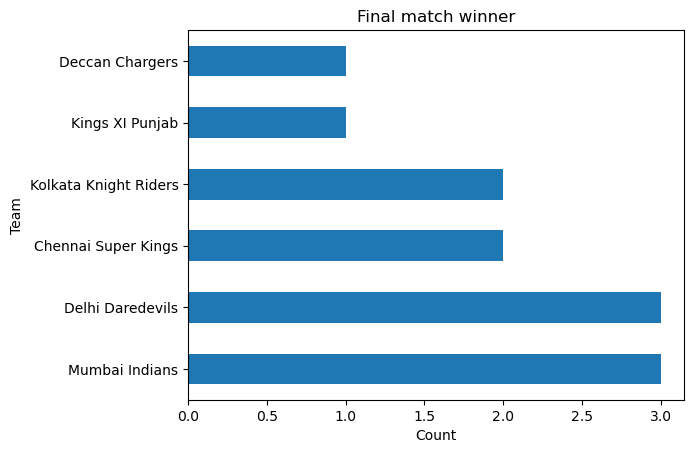

In [141]:
final_match_winner.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Team')
plt.title('Final match winner')
plt.show()

From above mumbaiindians and delhi daredevil won the cup 3 times

### Player of the match

In [131]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,77,IPL-2008,Hyderabad,2008-01-05,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin
1,78,IPL-2008,Jaipur,2008-01-05,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar
2,117,IPL-2008,Mumbai,2008-01-06,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
3,79,IPL-2008,Chennai,2008-02-05,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan
4,111,IPL-2008,Bangalore,2008-03-05,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri


In [146]:
player = df['player_of_match'].value_counts()[0:10]

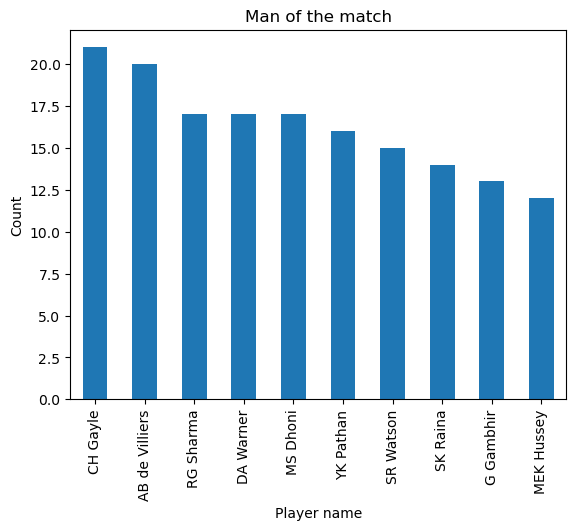

In [153]:
player.plot(kind='bar')
plt.xlabel('Player name')
plt.ylabel('Count')
plt.title('Man of the match')
plt.show()